# Working with GDP data

### Introduction
This notebook aims to analyze the drifters positions at a specific time within the tropical Atlantic Ocean. 
 
### Data Sources
- Drifter Data:
  - Source: NOAA
  - Collection Frequency: Every 6 hours
  - Total Number of Drifters: 221

## Import Library

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## File Location and Name


In [2]:
fn='./drifter_6hour_qc_893c_d15d_c4b7_U1711967648742.nc';
ds=xr.open_dataset(fn);

## Read Drifter Data

In [3]:
ds

<xarray.Dataset>
Dimensions:    (row: 78383)
Dimensions without coordinates: row
Data variables:
    time       (row) datetime64[ns] ...
    latitude   (row) float64 ...
    longitude  (row) float64 ...
    sst        (row) float64 ...
    ve         (row) float64 ...
    vn         (row) float64 ...
Attributes: (12/54)
    acknowledgement:            Lumpkin, Rick; Centurioni, Luca (2019). Globa...
    cdm_data_type:              Trajectory
    cdm_trajectory_variables:   ID
    comment:                    Global Drifter Program 6h data
    contributor_name:           NOAA Global Drifter Program
    contributor_role:           Data Acquisition Center
    ...                         ...
    summary:                    Global Drifter Program 6-hourly drifting buoy...
    time_coverage_end:          2023-10-14T18:00:00Z
    time_coverage_start:        2023-01-01T00:00:00Z
    title:                      Global Drifter Program - 6 Hour Interpolated ...
    Westernmost_Easting:        -70.0
    wmo_platform_code:          4600620

## Extract Coordinates and Variables

In [4]:
print(ds)
ve_curr = ds.ve.values
vn_curr = ds.vn.values
sst = ds.sst.values
lon = ds.longitude.values
lat = ds.latitude.values
time = ds.time.values   

<xarray.Dataset>
Dimensions:    (row: 78383)
Dimensions without coordinates: row
Data variables:
    time       (row) datetime64[ns] ...
    latitude   (row) float64 ...
    longitude  (row) float64 ...
    sst        (row) float64 ...
    ve         (row) float64 ...
    vn         (row) float64 ...
Attributes: (12/54)
    acknowledgement:            Lumpkin, Rick; Centurioni, Luca (2019). Globa...
    cdm_data_type:              Trajectory
    cdm_trajectory_variables:   ID
    comment:                    Global Drifter Program 6h data
    contributor_name:           NOAA Global Drifter Program
    contributor_role:           Data Acquisition Center
    ...                         ...
    summary:                    Global Drifter Program 6-hourly drifting buoy...
    time_coverage_end:          2023-10-14T18:00:00Z
    time_coverage_start:        2023-01-01T00:00:00Z
    title:                      Global Drifter Program - 6 Hour Interpolated ...
    Westernmost_Easting:        -70.

## Creation of Pandas Array for Drifter Data

In [6]:
data = {
    'Longitude': lon,
    'Latitude' : lat,
    'time'     : time,
    've'       : ve_curr,
    'vn'       : vn_curr,
    'sst'      : sst
}

df = pd.DataFrame(data)
df

,Longitude,Latitude,time,ve,vn,sst
0,-14.478,-18.548,2023-01-01 00:00:00,-0.13760,-0.07635,23.612
1,-14.499,-18.556,2023-01-01 06:00:00,-0.09969,0.01322,23.564
2,-14.519,-18.543,2023-01-01 12:00:00,-0.15719,0.08193,23.699
3,-14.563,-18.524,2023-01-01 18:00:00,-0.26155,0.03533,23.856
4,-14.626,-18.529,2023-01-02 00:00:00,-0.23922,-0.07837,23.717
...,...,...,...,...,...,...
78378,-22.006,-19.946,2023-06-11 12:00:00,-0.03853,-0.05076,25.189
78379,-22.013,-19.961,2023-06-11 18:00:00,-0.05150,-0.06262,25.179
78380,-22.027,-19.971,2023-06-12 00:00:00,-0.06030,-0.04773,25.133
78381,-22.038,-19.980,2023-06-12 06:00:00,-0.06036,-0.05688,25.093


## Visualizing Drifters at a Specified Time


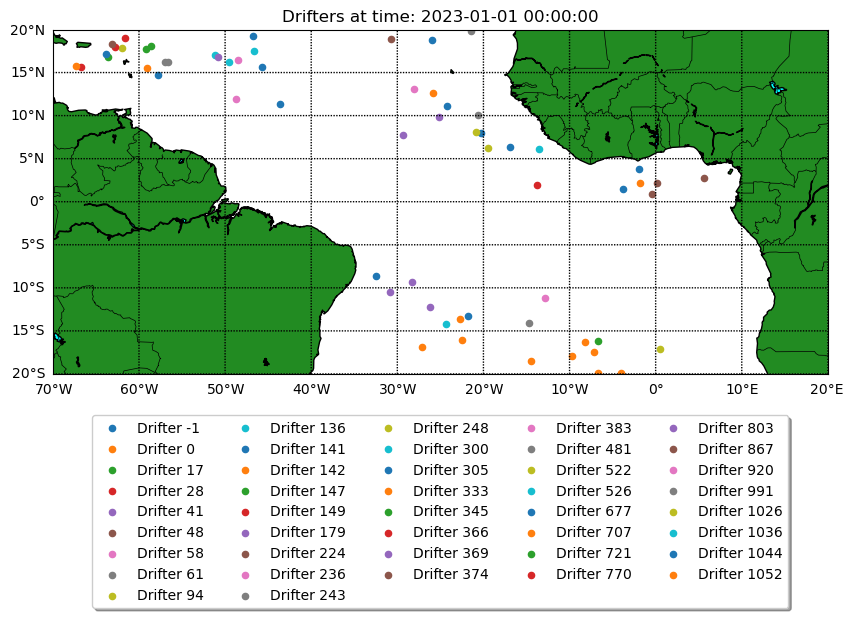

<Figure size 640x480 with 0 Axes>

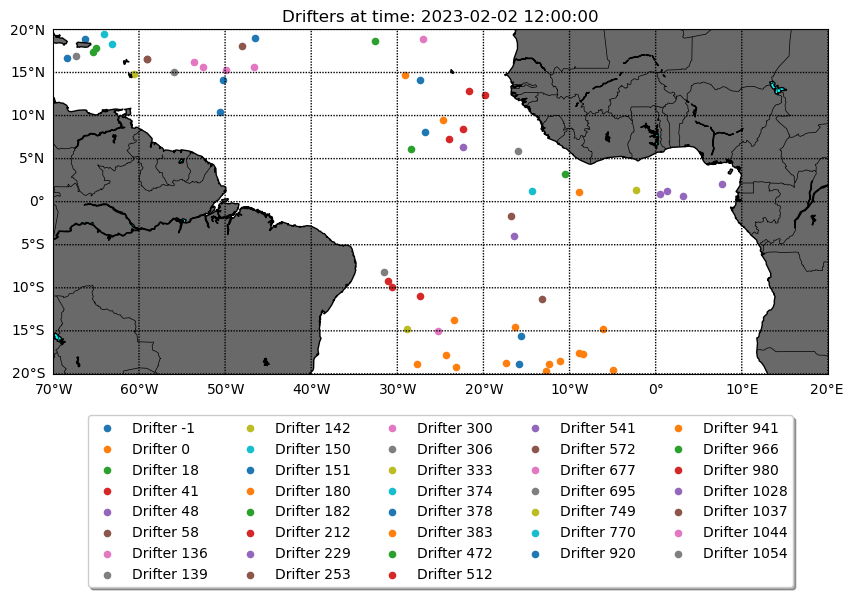

<Figure size 640x480 with 0 Axes>

In [48]:
# Assuming you have a DataFrame named 'df' with columns 'longitude', 'latitude', and 'time'
# Step 1: Detect drifters using DBSCAN
# Not that, DBSCAN is a versatile clustering algorithm suitable for a wide range of applications,
# especially when dealing with spatial data featuring irregular-shaped clusters and noise.

from sklearn.cluster import DBSCAN

epsilon = 0.1
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df['drifter'] = dbscan.fit_predict(df[['Longitude', 'Latitude']])

# Step 2: Define a function to visualize drifters at a specific time
def visualize_drifters_at_time(df, time_value):
    fig = plt.figure(figsize=(10, 8))
    m = Basemap(projection='cyl', resolution='l',
                llcrnrlat=-20,
                urcrnrlat=20,
                llcrnrlon=-70,
                urcrnrlon=20)
    m.drawcoastlines()
    m.drawcountries()
    #m.drawrivers()
    m.fillcontinents(color='forestgreen', lake_color='aqua')
    m.drawparallels(np.arange(-90., 91., 5.), labels=[1, 0, 0, 0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 10.), labels=[0, 0, 0, 1], fontsize=10)
    
    for drifter_id, drifter_df in df.groupby('drifter'):
        plt.scatter(drifter_df['Longitude'], drifter_df['Latitude'], label=f'Drifter {drifter_id}', s=20)
    
    plt.title(f'Drifters at time: {time_value}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)
    plt.show()

# Step 3: Visualize drifters at a specific time
specific_time = '2023-01-01 00:00:00'  # Change this to your desired time
df_at_time = df[df['time'] == specific_time]
visualize_drifters_at_time(df_at_time, specific_time)
plt.savefig('fig5 mode.png')

# Assuming you have a DataFrame named 'df' with columns 'longitude', 'latitude', and 'time'
# Step 1: Detect drifters using DBSCAN
from sklearn.cluster import DBSCAN

epsilon = 0.1
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
df['drifter'] = dbscan.fit_predict(df[['Longitude', 'Latitude']])

# Step 2: Define a function to visualize drifters at a specific time
def visualize_drifters_at_time(df, time_value):
    fig = plt.figure(figsize=(10, 8))
    m = Basemap(projection='cyl', resolution='l',
                llcrnrlat=-20,
                urcrnrlat=20,
                llcrnrlon=-70,
                urcrnrlon=20)
    m.drawcoastlines()
    m.drawcountries()
    #m.drawrivers()
    m.fillcontinents(color='dimgray', lake_color='aqua')
    m.drawparallels(np.arange(-90., 91., 5.), labels=[1, 0, 0, 0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 10.), labels=[0, 0, 0, 1], fontsize=10)
    
    for drifter_id, drifter_df in df.groupby('drifter'):
        plt.scatter(drifter_df['Longitude'], drifter_df['Latitude'], label=f'Drifter {drifter_id}', s=20)
    
    plt.title(f'Drifters at time: {time_value}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)
    plt.show()

# Step 3: Visualize drifters at a specific time
specific_time = '2023-02-02 12:00:00'  # Change this to your desired time
df_at_time = df[df['time'] == specific_time]
visualize_drifters_at_time(df_at_time, specific_time)
plt.savefig('fig6 mode.png')